In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs


tf = pd.read_csv('/home/santi/fiuba-tf-tp1-final-set/events.csv',dtype=object)

# Breve descripcion del set de datos.

# Columnas
tf.columns

tf.head()

tf.describe()

tf.info()

# Analizo eventos y relacion de estos con otras variables

# Hay eventos nulos en la columna event?
tf['event'].isnull().sum()

# Comprobamos si hay alguna fecha nula. 
tf['timestamp'].isnull().any()

# Agregamos nuevas columnas para trabajar mejor con el tiempo. (año, mes, dia, dia del año)
tf['timestamp_datetime'] = pd.to_datetime(tf['timestamp'])
tf['timestamp_year'] = tf['timestamp_datetime'].dt.year
tf['timestamp_month'] = tf['timestamp_datetime'].dt.month
tf['timestamp_day'] = tf['timestamp_datetime'].dt.day
tf['timestamp_weekday'] = tf['timestamp_datetime'].dt.weekday_name
tf['timestamp_dayofyear'] = tf['timestamp_datetime'].dt.dayofyear

## Eventos en general

# Nombres de los eventos.

tf['event'].value_counts()

# Ocurrencias de eventos (grafico)

g1 = sns.barplot(x=tf['event'].value_counts().values, y=tf['event'].value_counts().index, orient='h')
g1.set_title("Ocurrencias de eventos", fontsize=15)
g1.set_xlabel("Ocurrencias", fontsize=12)
g1.set_ylabel("Eventos", fontsize=12)

# Analizamos la evolucion de las visitas en la pagina. hacer
#tf.loc(tf[''])

#tf.groupby('timestamp_dayofyear').agg({'person':'d'})

# Analizo el evento viewed product y brand listing.

# Modelo de celular mas visitado.
# Me quedo solo con el evento viewed product.
viewed_product = tf.loc[tf['event'] == 'viewed product']

# Veo si hay algun valor nulo en la columna model.
viewed_product['model'].isnull().sum()

## Celulares mas visitados

# Modelo de celular mas visitado.
viewed_product['model'].value_counts()

# 15 celulares mas visitados.
viewed_product['model'].value_counts().head(15)

# Grafico de barras de los 15 celulares mas visitados.

g2 = sns.barplot(x=viewed_product['model'].value_counts().head(15).values, y=viewed_product['model'].value_counts().head(15).index,palette="Blues_d", orient='h')

g2.set_title("15 celulares mas visitados.", fontsize=15)
g2.set_xlabel("Cantidad de visitas", fontsize=12)
g2.set_ylabel("Celulares", fontsize=12)

# Columnas que puedo relacionar con las visitas a los productos (no tienen valores nulos).
viewed_product.dropna(axis = 'columns').columns

# Visitas de cada celular para cada color.
visitas_por_color = viewed_product.groupby(['model','color']).agg({'timestamp':'count'})
visitas_por_color.columns = ['visitas']
visitas_por_color

# Visitas de cada celular para cada capacidad de almacenamiento.
visitas_por_storage = viewed_product.groupby(['model','storage']).agg({'timestamp':'count'})
visitas_por_storage.columns = ['visitas']
visitas_por_storage

# Visitas de cada celular para cada condicion de producto.
visitas_por_condition = viewed_product.groupby(['model','condition']).agg({'timestamp':'count'})
visitas_por_condition.columns = ['visitas']
visitas_por_condition

cel_mas_visitados = ['iPhone 6','iPhone 5s','iPhone 6S','iPhone 7', 'Samsung Galaxy S7 Edge']
cel_mas_visitados_por_storage = viewed_product[['model','storage']].loc[viewed_product['model'].isin(cel_mas_visitados)]
cel_mas_visitados_por_storage = pd.crosstab(cel_mas_visitados_por_storage.model,cel_mas_visitados_por_storage.storage)
cel_mas_visitados_por_storage

r = [0,1,2,3,4]
cmvps = cel_mas_visitados_por_storage

totals = [i+j+k+l+m for i,j,k,l,m in zip(cmvps['128GB'], cmvps['16GB'],\
                                         cmvps['256GB'], cmvps['32GB'], cmvps['64GB'])]
celcon128 = [i / j * 100 for i,j in zip(cmvps['128GB'], totals)]
celcon16 = [i / j * 100 for i,j in zip(cmvps['16GB'], totals)]
celcon256 = [i / j * 100 for i,j in zip(cmvps['256GB'], totals)]
celcon32 = [i / j * 100 for i,j in zip(cmvps['32GB'], totals)]
celcon64 = [i / j * 100 for i,j in zip(cmvps['64GB'], totals)]

barWidth = 0.85
names = ('S7 Edge','iPhone 5s','iPhone 6','iPhone 6S','iPhone 7')

plt.figure(figsize=(5,3))

plt.bar(r, celcon256, color='#A20101', edgecolor='white', width=barWidth, label = '256GB')

plt.bar(r, celcon128, bottom=celcon256, color='#F44E54', edgecolor='white', width=barWidth, label = '128GB')

plt.bar(r, celcon64, bottom=[i+j for i,j in zip(celcon256, celcon128)], color='#FDDB5E', edgecolor='white'\
                                                , width=barWidth, label = '64GB')

plt.bar(r, celcon32, bottom=[i+j+k for i,j,k in zip(celcon256, celcon128,celcon64)], color='#BAF1A1'\
                                                    , edgecolor='white', width=barWidth, label = '32GB')

plt.bar(r, celcon16, bottom=[i+j+k+l for i,j,k,l in zip(celcon256, celcon128,celcon64,celcon32)], color='#76AD3B'\
                                                        , edgecolor='white', width=barWidth, label = '16GB')

plt.xticks(r, names,fontsize=9)
plt.title('5 celulares mas visitados y su almacenamiento')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()

cel_mas_visitados_por_color = viewed_product[['model','color']].loc[viewed_product['model'].isin(['iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus'])]
cel_mas_visitados_por_color = pd.crosstab(cel_mas_visitados_por_color.model,cel_mas_visitados_por_color.color)
cel_mas_visitados_por_color

r = [0,1,2,3,4]
cmvpc = cel_mas_visitados_por_color

totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(cmvpc['Cinza espacial']\
                                                 , cmvpc['Dourado'],cmvpc['Ouro Rosa'], cmvpc['Prateado']\
                                                 , cmvpc['Preto Brilhante'],cmvpc['Preto Matte'],cmvpc['Vermelho'])]

celconCinza = [i / j * 100 for i,j in zip(cmvpc['Cinza espacial'], totals)]
celconDourado = [i / j * 100 for i,j in zip(cmvpc['Dourado'], totals)]
celconRosa = [i / j * 100 for i,j in zip(cmvpc['Ouro Rosa'], totals)]
celconPrateado = [i / j * 100 for i,j in zip(cmvpc['Prateado'], totals)]
celconBrilhante = [i / j * 100 for i,j in zip(cmvpc['Preto Brilhante'], totals)]
celconMatte = [i / j * 100 for i,j in zip(cmvpc['Preto Matte'], totals)]
celconVermelho = [i / j * 100 for i,j in zip(cmvpc['Vermelho'], totals)]

barWidth = 0.5
names = ('iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus')

plt.figure(figsize=(5,3))

plt.bar(r, celconCinza, color='gray', edgecolor='white', width=barWidth, label = 'Gris')

plt.bar(r, celconDourado, bottom=celconCinza, color='gold', edgecolor='white', width=barWidth, label = 'Dorado')

plt.bar(r, celconRosa, bottom=[i+j for i,j in zip(celconCinza, celconDourado)], color='pink', edgecolor='white', width=barWidth, label = 'Rosa')

plt.bar(r, celconPrateado, bottom=[i+j+k for i,j,k in zip(celconCinza, celconDourado,celconRosa)], color='silver', edgecolor='white', width=barWidth, label = 'Plateado')

plt.bar(r, celconBrilhante, bottom=[i+j+k+l for i,j,k,l in zip(celconCinza, celconDourado,celconRosa,celconPrateado)], color='black', edgecolor='white', width=barWidth, label = 'Negro brillante')

plt.bar(r, celconMatte, bottom=[i+j+k+l+m for i,j,k,l,m in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante)], color='#181609', edgecolor='white', width=barWidth, label = 'Negro matte')

plt.bar(r, celconVermelho, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante,celconMatte)], color='#b61609', edgecolor='white', width=barWidth, label = 'Rojo')




plt.xticks(r, names,fontsize=9)
plt.title('5 iPhones mas visitados y su color')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()


## Visitas a un producto en el tiempo

# Vemos las visitas a un producto segun dia de la semana y mes.
visitas_prod_mes_dia_semana = viewed_product.groupby(['timestamp_month','timestamp_weekday']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_weekday',columns = 'timestamp_month',values = 'event')
visitas_prod_mes_dia_semana

visitas_prod_mes_dia_semana = sns.heatmap(visitas_prod_mes_dia_semana,  cmap="YlGnBu")
visitas_prod_mes_dia_semana.set_title("Visitas a un producto segun mes y dia de la semana", fontsize=22)
visitas_prod_mes_dia_semana.set_xlabel("Mes de la visita",fontsize=18)
visitas_prod_mes_dia_semana.set_ylabel("Dia de la visita", fontsize=18)

# Vemos las visitas a un producto segun mes y dia del mes.
visitas_prod_mes_dia = viewed_product.groupby(['timestamp_month','timestamp_day']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_month',columns = 'timestamp_day',values = 'event')
visitas_prod_mes_dia

visitas_prod_mes_dia = sns.heatmap(visitas_prod_mes_dia,  cmap="YlGnBu")
visitas_prod_mes_dia.set_title("Visitas a un producto segun mes y dia del mes", fontsize=22)
visitas_prod_mes_dia.set_xlabel("Dia del mes de la visita",fontsize=18)
visitas_prod_mes_dia.set_ylabel("Mes de la visita", fontsize=18)

# Visitas a productos segun dia del año
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(linewidth=2,figsize=(8,4))


# Veo con que puedo relacionar cada evento.
hay otras columnas que pueden tener algunos elementos null pero pueden servir igual (son pocos).

rel_event = tf.groupby('event').agg(lambda x: x.isnull().sum()).T
rel_event

## ad campaign hit

“ad campaign hit”: El usuario ingresa al sitio mediante una campana de marketing online.

Me puede interesar analizar url, person , campaign source y el tiempo.

ad_campaign_hit = tf.loc[tf['event'] == 'ad campaign hit']
ad_campaign_hit['campaign_source'].isnull().sum()

# La columna cuenta con 31 valores nulos. Son muy pocos comparados con los datos que tenemos, asi que trabajo
# con el resto.

# Campañas publicitarias mas populares.
ad_campaign_hit['campaign_source'].value_counts()

# Grafico de popularidad de campañas publicitarias.

g2 = sns.barplot(x=ad_campaign_hit['campaign_source'].value_counts().head(10).values, y=ad_campaign_hit['campaign_source'].value_counts().head(10).index,palette="Blues_d", orient='h')

g2.set_title("10 Campañas mas populares.", fontsize=15)
g2.set_xlabel("Cantidad de visitas", fontsize=12)
g2.set_ylabel("Campañas", fontsize=12)

# Campañas publicitarias mas populares segun el mes.
pd.crosstab(ad_campaign_hit.timestamp_month,ad_campaign_hit.campaign_source)

# Un grafico de lo mismo.
camp_ppales = ['google','criteo', 'rtbhouse', 'zanox', 'emblue']
g = sns.countplot(x="timestamp_month", hue="campaign_source"\
                , tf=ad_campaign_hit.loc[ad_campaign_hit['campaign_source'].isin(camp_ppales)], palette="hls")
g.set_title("Clicks en campañas publicitarias (top 5)", fontsize=18)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de clicks", fontsize=18)

# Clicks por dia de las 5 campañas publicitarias mas populares (con mas clicks).
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4),label = 'Google')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Zanox')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Criteo')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Rtbhouse')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Emblue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.ylabel('Cantidad de clicks')


# Ademas podemos ver si existe algun tipo de relacion entre los clicks en la campañas publicitarias
# y las visitas y compras de los productos.

(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Zanox',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Criteo',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Rtbhouse',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Emblue',alpha = 0.3)
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(logy = True, linewidth=3\
                                                                          ,label = 'Visitas a productos')
tf.loc[tf['event'] == 'conversion'].groupby('timestamp_dayofyear').count().loc[:,'event']\
                                                .plot(linewidth=3,label = 'Conversion de productos')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Relacion de la cantidad de clicks en campañas con visitas y compras de productos')


Podemos ver que a medida que aumentan los clicks en las campañas publicitarias, tambien
lo hacen las visitas a productos, lo cual es logico. Algo quizas no tan esperado es que aunque aumentan
las visitas y los clicks en las publicidades, las conversiones no parecen aumentar. En la primer mitad podemos
ver que era mas baja la cantidad de conversiones, pero luego distingimos que estas se mantienen aroximadamente 
constantes a pesar del incremento en las visitas.


ad_campaign_hit['url'].value_counts(normalize = False).drop(labels = '/')
# Podemos ver que direcciones, y por lo tanto que celulares, son las que mas son clickeadas.

ad_campaign_hit['person'].value_counts() # Ver si lo puedo relacionar con algo.

## generic listing

El usuario visita la homepage.

# Podria investigar que paso con los skus, person y el tiempo.

## searched products
El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site.


# Que suelen buscar los usuarios.
searched_products = tf.loc[tf['event'] == 'searched products']
searched_products['search_term'].str.lower().value_counts(normalize = True)

# Podemos ver que la mayoria de las busquedas son de celulares iPhone, seguido por los samsung.

# calculo aproximado.
iphone = searched_products['search_term'].str.lower().str.contains('iphone|5s|5c|6s|7s').sum()
total = searched_products['search_term'].count()
(iphone / total) * 100 
# Los iphone constituyen aproximadamente el 40 %  de las busquedas.

samsung = searched_products['search_term'].str.lower().str.contains('samsung|s3|s4|s5|s6|s7|s8|j7|j5|j3|note|a3|a5|a7').sum()
(samsung / total) * 100
# Los samsung constituyen aproximadamente un 30 % de la busquedas.

motorola = searched_products['search_term'].str.lower().str.contains('moto').sum()
(motorola / total) * 100
# Los motorola constituyen aproximadamente un 10 % de la busquedas.

## search engine hit
“search engine hit”: El usuario ingresa al sitio mediante un motor de búsqueda web.


search_engine_hit = tf.loc[tf['event'] == 'search engine hit']

# Las visitas se dan por un motor de busqueda. Cuales son los mas populares?
search_engine_hit['search_engine'].value_counts()

# Ingresos a traves de un motor de busqueda.

g = sns.barplot(x=search_engine_hit['search_engine'].value_counts().values, y=search_engine_hit['search_engine'].value_counts().index,palette="Blues_d", orient='h')
g.set_xscale('log')
g.set_title("Ingreso a traves de motor de busqueda", fontsize=15)
g.set_xlabel("Cantidad de visitas (escala logaritmica)", fontsize=12)
g.set_ylabel("Motores de busqueda", fontsize=12)

# Ingresos a traves de un motor de busqueda en el tiempo.

(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google', logy = True)
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Bing']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Bing')
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Yahoo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Yahoo')
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Ask']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Ask')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Ingresos a traves de un motor de busqueda en el tiempo')


## checked out



## visited site
En ppio puedo relacionarlo con person, news vs returning, city, region, country, device_type, screen_resolution, operating_system_version, browser_version y el tiempo

visited_site = tf.loc[tf['event'] == 'visited site']

# Analizo desde donde se hacen las visitas.

# Visitas por pais
visited_site['country'].value_counts()

# Analizo que pasa con el pais Unknown.

visited_site.loc[visited_site['country'] == 'Unknown']['city']

visited_site.loc[visited_site['country'] == 'Unknown']['region']

# No hay informacion tampoco de la ciudad ni de la region.
# Lo saco para poder analizar lo demas.
visited_site_geo = visited_site.loc[(visited_site['country'] != 'Unknown') & (visited_site['city'] != 'Unknown') & \
                                   (visited_site['region'] != 'Unknown')]

# Visitas por pais.
visited_site_geo['country'].value_counts()
# Practicamente todas las visitas fueron de Brazil.

# Visitas por ciudad.
visited_site_geo['city'].value_counts()

# Visitas por region.
visited_site_geo['city'].value_counts()

# Visitas por estado.

# Saco los acentos y pongo todo en minuscula.

estados_br = visited_site_geo['region'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
estados_br = estados_br.str.lower()
estados_br

estados_br.value_counts()

# Me quedo solo con los estados de Brasil.
## GRAFICO PENDIENTE!!!! 
lista_estados_br = ['acre', 'alagoas', 'amapa', 'la amazonas', 'bahia', 'ceara', 'espiritu santo', 'goias', 'maranhao', 'mato grosso', 'mato grosso do sul', 'minas gerais', 'para', 'paraiba', 'parana', 'pernambuco', 'piaui', 'rio de janeiro', 'rio grande do norte', 'rio grande do sul', 'rondonia', 'roraima', 'santa catarina', 'sao paulo', 'sergipe', 'tocantins']
estados_br = estados_br.loc[estados_br.isin(lista_estados_br)]
estados_br.value_counts()



SyntaxError: invalid syntax (<ipython-input-1-9e98e89e0626>, line 219)

#  Person 

Colummna 'person': identificacion de cliente

### Cantidad de visitas por compra de cliente

Solo se analiza a los clientes que tienen por lo menos una compra.

In [178]:
#seba

person_event = tf.filter(items=['person', 'event'])
person_event['cant'] = 1
person_event = person_event.loc[(person_event['event'] == 'conversion') | (person_event['event'] == 'viewed product')]

person_conv = person_event.groupby(['person', 'event']).agg({'cant': 'sum'}).unstack()
person_conv = person_conv.loc[(person_conv['cant']['conversion'].notnull()) & (person_conv['cant']['conversion'] != 0)]

In [103]:
# Cambio nombre columnas
person_conv.columns = ['conversion', 'viewed product']
person_conv.head()

,conversion,viewed product
person,,
00204059,1.00,44.00
00c13dee,1.00,17.00
00fdbb4b,1.00,3.00
0146a9df,1.00,23.00
01db2fe6,1.00,67.00


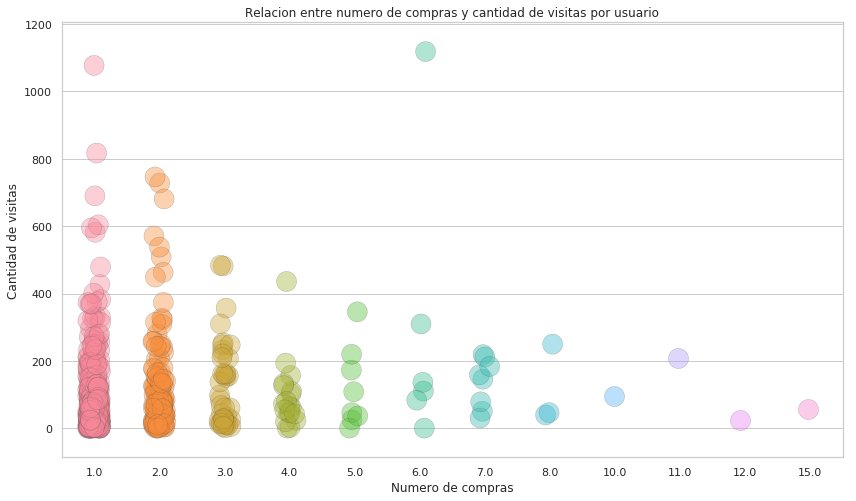

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

dx = sns.stripplot(x="conversion", y="viewed product", data=person_conv,\
                   jitter=True, linewidth=0.4, alpha=.4, marker=".", size=40, ax=ax)

dx.set(xlabel='Numero de compras', ylabel='Cantidad de visitas', \
       title='Relacion entre numero de compras y cantidad de visitas por usuario');


Cada punto es un cliente (identificado a partir de la columna 'person') que posee una cantidad total de visitas al sitio (cantidad de eventos 'viewed product') y un numero total de compras (cantidad de eventos 'conversion').

### ¿Cuantos usuarios regresan 'x' cantidad de veces al sitio?

In [177]:
#seba

# No hay registros de personas NaN seguiraca
tf['person'].isna().sum()

0

In [108]:
# Cantidad de usuarios distintos registrados
tf['person'].value_counts().count()

27624

In [114]:
new_vs_returning = tf.filter(items=['person', 'new_vs_returning'])


# Podemos considerar que todos los valores nulos son registros de usuarios que regresan al sitio ('Returning').
# Luego descartaremos los usuarios que no tienen ningun registro de haber ingresado al sitio por primera vez ('New').

new_vs_returning.fillna({'new_vs_returning': 'Returning'}, inplace=True)

new_vs_returning = new_vs_returning.groupby(['person'])['new_vs_returning'].value_counts(dropna=False)

In [115]:
# Obtengo una serie
new_vs_returning.head()

person    new_vs_returning
0004b0a2  Returning            3
          New                  1
0006a21a  Returning            3
          New                  1
000a54b2  Returning           36
Name: new_vs_returning, dtype: int64

In [116]:
# Construyo un DataFrame
new_vs_returning_df = new_vs_returning.unstack()
new_vs_returning_df.head()

new_vs_returning,New,Returning
person,,
0004b0a2,1.00,3.00
0006a21a,1.00,3.00
000a54b2,1.00,36.00
00184bf9,1.00,50.00
0019c395,1.00,7.00


In [117]:
# Veo cuantos nulos hay en la columna 'New'. Es decir, cuantos usuarios no fueron detectados por primera vez
new_vs_returning_df['New'].value_counts(dropna=False)

1.00    26898
 nan      726
Name: New, dtype: int64

In [118]:
# Veo cuantos nulos hay en la columna returning
new_vs_returning_df['Returning'].isna().sum()

0

In [119]:
# Elimino los usuarios que no fueron detectados por primera vez:
new_vs_returning_df.dropna(inplace=True)

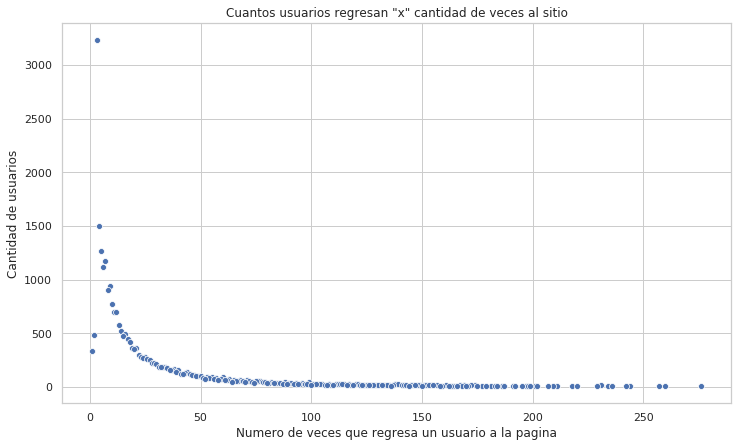

In [157]:
#Si tomamos Todos los valores registrados:

fig, ax = plt.subplots(figsize=(12,7))

relacion = new_vs_returning_df['Returning'].value_counts(sort=True).head(200)

g = sns.scatterplot(x=relacion.index, y=relacion.values, palette="Blues_d", ax=ax)

g.set(xlabel='Numero de veces que regresa un usuario a la pagina', ylabel='Cantidad de usuarios',\
    title='Cuantos usuarios regresan "x" cantidad de veces al sitio');

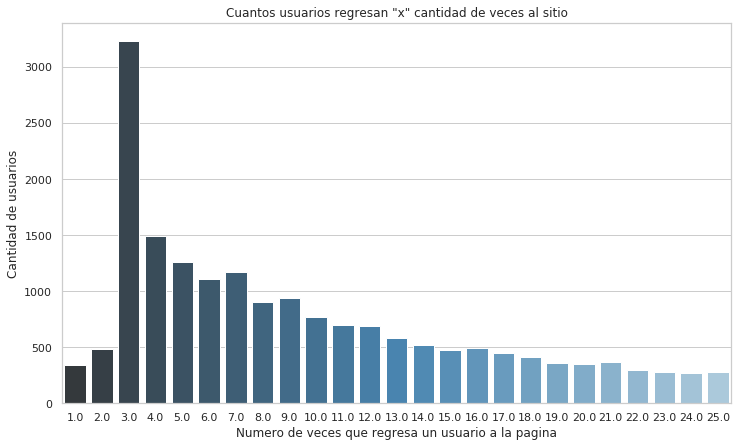

In [180]:
#mejor hacer histograma???????????
# Restringiendo los valorespara una mejor visualizacion y mas especifica:

fig, ax = plt.subplots(figsize=(12,7))

nums = range(1, 24)

relacion = new_vs_returning_df['Returning'].value_counts(sort=True).head(25)

g = sns.barplot(x=relacion.index, y=relacion.values, palette="Blues_d", orient='v', ax=ax)

g.set(xlabel='Numero de veces que regresa un usuario a la pagina', ylabel='Cantidad de usuarios',\
    title='Cuantos usuarios regresan "x" cantidad de veces al sitio');

---

# New vs Returning

New: Usuario que entra por primera ve a la página.

Returning: Usuario que ya entró una o más veces a la página.

###  'New vs Returning' por mes

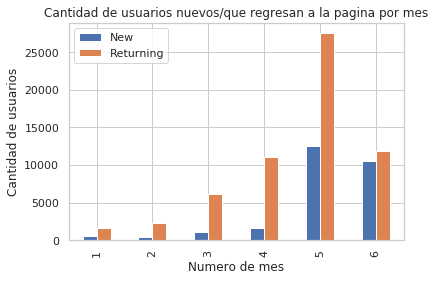

In [190]:
#seba

df_new_vs_ret = tf.filter(items = ['timestamp_datatime', 'new_vs_returning'])

g = tf.groupby([tf['timestamp_datetime'].dt.month, 'new_vs_returning']).size().unstack().plot(kind='bar')
g.set(xlabel='Numero de mes', ylabel='Cantidad de usuarios', title='Cantidad de usuarios nuevos/que regresan a la pagina por mes')
g.legend(['New', 'Returning']);

In [6]:
comprados = tf.loc[tf['event'] == 'conversion']

# Agrego col con nombre del dia
comprados['weekday name'] = tf['timestamp'].dt.weekday_name

/home/seba/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Cantidad de compras por dia de la semana

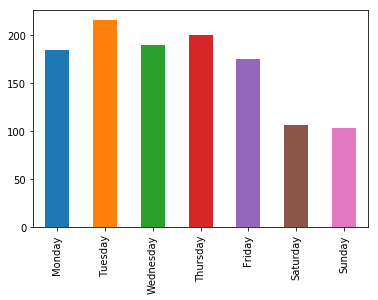

In [7]:
#listo
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

comprados['weekday name'].value_counts().reindex(days).plot(kind='bar')

## Cantidad total de eventos por horario

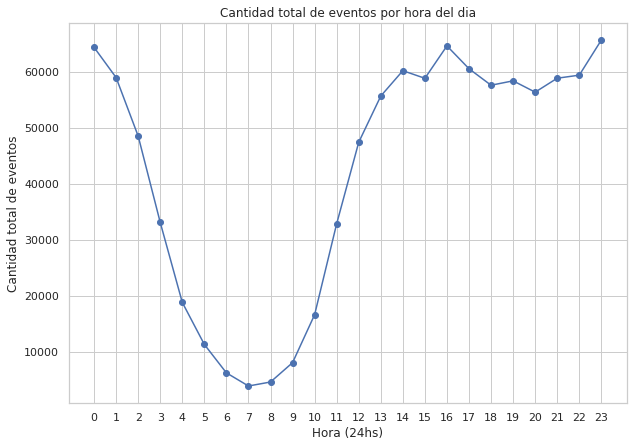

In [14]:
#listo

tf_hr = tf.filter(items = ['country','timestamp_datetime', 'event'])

tf_hr['hour'] = tf_hr['timestamp_datetime'].dt.hour

gr = tf_hr['hour'].value_counts(sort=False).plot(kind='line', figsize=(10, 7), grid=True, style="-o")
gr.set(xlabel='Hora (24hs)', ylabel='Cantidad total de eventos', title='Cantidad total de eventos por hora del dia')
plt.xticks(range(0, 24));

# Analisis de Eventos:

## Cantidad de cada tipo de evento:

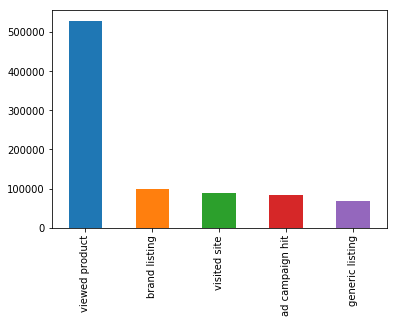

In [107]:
# 5 predominantes:
eventos = tf['event'].value_counts()
eventos.head().plot(kind='bar')

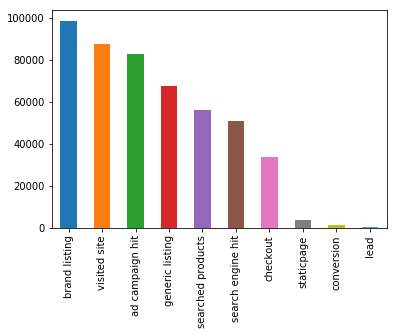

In [111]:
# Sacando evento 'viewed products':

tf['event'].loc[tf['event'] != 'viewed product'].value_counts().plot(kind='bar')

## Cantidad de eventos totales por pais

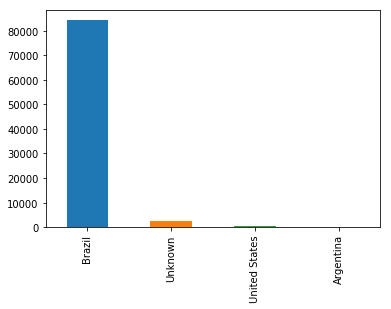

In [268]:
# los 4 predominantes:
# el grafico es feo

tf_short = tf.filter(items = ['event', 'country'])
tf_short['country'].value_counts().head(4).plot(kind='bar')

## Cantidad de eventos 'viewed product' por mes

Text(0.5,0,'Month')

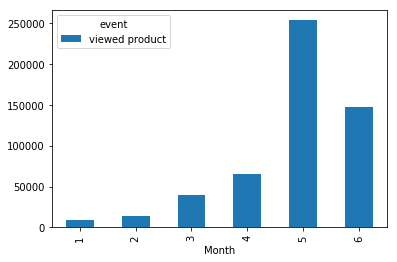

In [269]:
#listo

tf_event_vp = tf.loc[tf['event'] == 'viewed product' ]
g = tf_event_vp.groupby([tf['timestamp'].dt.month, 'event']).size().unstack()\
                        .plot(kind='bar')
g.set_xlabel("Month")

## cant ckeckouts >>> cant conversions:

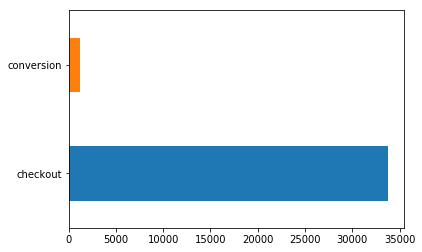

In [270]:
#mal grafico?
tf_event = tf.filter(items = ['event', 'timestamp'])
checkout_vs_conv = tf_event.loc[(tf['event'] == 'checkout') | (tf['event'] == 'conversion')]
checkout_vs_conv['event'].value_counts().plot(kind='barh')

## Modelos mas comprados:

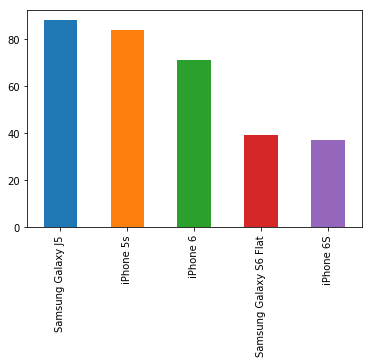

In [260]:
tf_event_mod = tf.filter(items = ['event', 'model'])
tf_event_mod.loc[tf_event_sku['event'] == 'conversion']['model'].value_counts().head().plot(kind='bar')

## Cantidad de comprados por condicion del producto

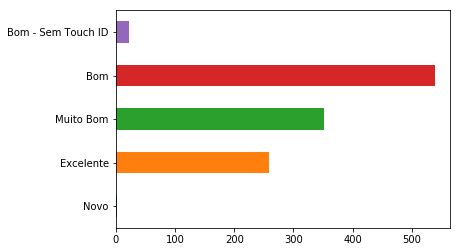

In [261]:
comprados = tf.loc[tf['event'] == 'conversion']

qual = ['Novo', 'Excelente', 'Muito Bom', 'Bom', 'Bom - Sem Touch ID']
comprados['condition'].value_counts().reindex(qual).plot(kind='barh')

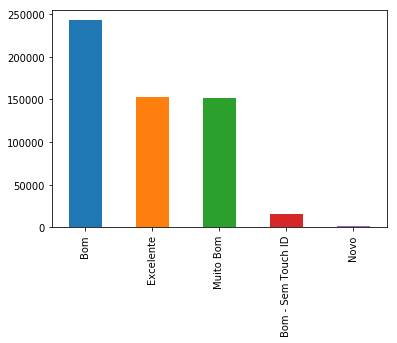

In [233]:
# Cantidad de productos (por 'condition') que tenemos en el tfset:

tf['condition'].value_counts().plot(kind='bar')

## Modelos no disponibles con más pedidos de notificación de stock 

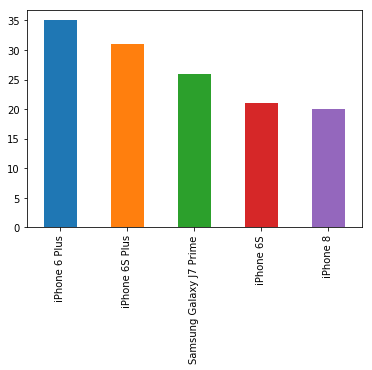

In [262]:
#aca2
tf_event_mod = tf.filter(items = ['event', 'model'])
tf_event_mod.loc[tf_event_mod['event'] == 'lead']['model'].value_counts().head().plot(kind='bar')

# 'new vs returning' por mes

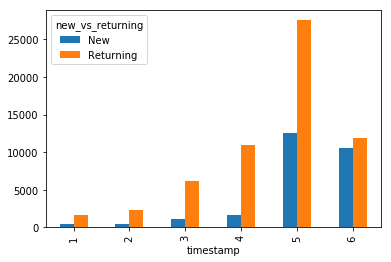

In [263]:
tf_new_vs_ret = tf.filter(items = ['event', 'new_vs_returning'])
tf.groupby([tf['timestamp'].dt.month, 'new_vs_returning']).size().unstack().plot(kind='bar')

## LUCAS

### Eventos más populares a lo largo de los meses

In [28]:
progreso_de_eventos = tf.groupby(['mes', 'event']).size().to_frame('size')
progreso_de_eventos['log_size'] = npy.log10(progreso_de_eventos['size'])
graf = progreso_de_eventos['log_size'].unstack()
graf

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
mes,,,,,,,,,,,
1,3.230960,3.290702,2.519828,1.799341,3.235781,1.505150,3.001301,3.127429,2.139879,3.946992,3.329398
2,3.369216,3.491502,2.644439,1.869232,3.309204,1.342423,3.126456,3.178113,2.021189,4.150142,3.445604
3,3.837083,3.928857,3.141763,2.423246,3.744528,1.838849,3.516800,3.603144,2.652246,4.598418,3.860158
4,4.036948,4.180499,3.293363,2.499687,3.995679,2.133539,3.751356,3.830011,2.814913,4.819175,4.102091
5,4.581016,4.653126,4.194376,2.545307,4.483901,1.949390,4.384873,4.416274,3.178113,5.403656,4.603545
6,4.360158,4.397036,4.145103,2.012837,4.251614,2.000000,4.188338,4.214208,2.872739,5.167400,4.350616


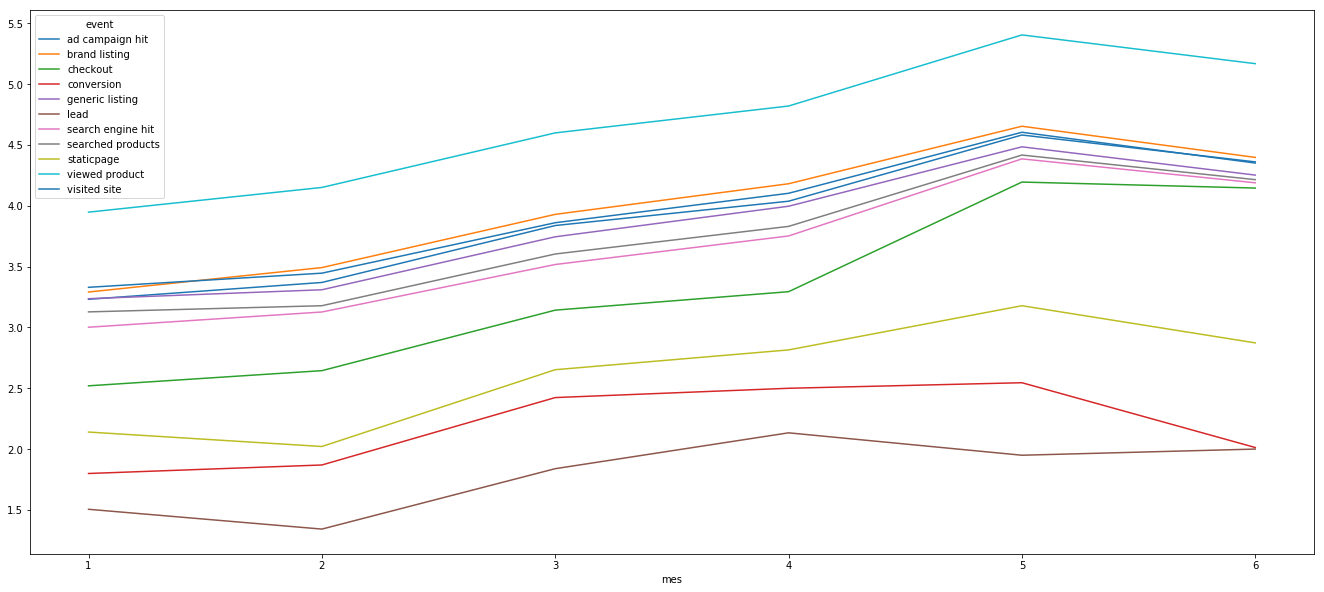

In [29]:
graf.plot(figsize = (23, 10))